## Better Pandas

This section cover tools to make your experience with Pandas a litte bit better.

### tqdm: Add Progress Bar to Your Pandas Apply

In [ ]:
!pip install tqdm 

If you want to keep informed about the progress of a pandas apply operation, use tqdm.

In [1]:
import pandas as pd 
from tqdm import tqdm 
import time 

df = pd.DataFrame({'a': [1, 2, 3, 4, 5], 'b': [2, 3, 4, 5, 6]})

tqdm.pandas()
def func(row):
    time.sleep(1)
    return row + 1

df['a'].progress_apply(func)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.00s/it]


0    2
1    3
2    4
3    5
4    6
Name: a, dtype: int64

[Link to tqdm](https://github.com/tqdm/tqdm).

### pandarallel: A Simple Tool to Parallelize Pandas Operations 

In [ ]:
!pip install pandarallel

If you want to parallelize your Pandas operations on all available CPUs by adding only one line of code, try pandarallel. 

In [13]:
from pandarallel import pandarallel
import pandas as pd
from numpy.random import randint

df = pd.DataFrame(
    {
        "a": randint(0, 100, size=10000),
        "b": randint(0, 100, size=10000),
        "c": randint(0, 100, size=10000),
    }
)

pandarallel.initialize(progress_bar=True)
df.parallel_apply(lambda x: x**2)


INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


,a,b,c
0,3025,324,441
1,1,6561,5329
2,2025,4900,1024
3,25,5776,25
4,16,8100,3364
...,...,...,...
9995,49,676,4761
9996,3721,6889,4
9997,4225,9025,1156
9998,361,9,529


[Link to pandarallel](https://github.com/nalepae/pandarallel).

### PandasAI: Gain Insights From Your pandas DataFrame With AI

In [ ]:
!pip install pandasai

If you want to quickly gain insights from your pandas DataFrame with AI, use PandasAI. PandasAI serves as: 

- A tool to analyze your DataFrame
- Not a tool to process your DataFrame

In [2]:
import pandas as pd  

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv")
df.head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [4]:
df.head(5)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [6]:
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI

# Instantiate a LLM
llm = OpenAI(api_token="YOUR_API_TOKEN")

# Use pandasai
pandas_ai = PandasAI(llm, conversational=False)
print(
    pandas_ai.run(
        df,
        prompt="Which month of the years has the highest number of passengers on average?",
    )
)


The month with the highest average number of passengers is: July



In [7]:
print(
    pandas_ai.run(
        df, prompt="Which are the five years with the highest passenger numbers?"
    )
)


year
1960    5714
1959    5140
1958    4572
1957    4421
1956    3939
Name: passengers, dtype: int64



In [8]:
print(pandas_ai.run(df, prompt="Within what range of years does the dataset span?"))


        year     month  passengers
0 1949-01-01   January         112
1 1949-01-01  February         118
2 1949-01-01     March         132
3 1949-01-01     April         129
4 1949-01-01       May         121
The dataset spans from 1949 to 1960.



[Link to PandasAI](https://github.com/gventuri/pandas-ai).

### fugue: Use pandas Functions on the Spark and Dask Engines. 

In [ ]:
!pip install fugue pyspark

Wouldn't it be nice if you can leverage Spark or Dask to parallelize data science workloads using pandas syntax? Fugue allows you to do exactly that.

Fugue provides the `transform` function allowing users to use pandas functions on the Spark and Dask engines. 

In [1]:
import pandas as pd
from typing import Dict
from fugue import transform
from fugue_spark import SparkExecutionEngine

input_df = pd.DataFrame({"id": [0, 1, 2], "fruit": (["apple", "banana", "orange"])})
map_price = {"apple": 2, "banana": 1, "orange": 3}


def map_price_to_fruit(df: pd.DataFrame, mapping: dict) -> pd.DataFrame:
    df["price"] = df["fruit"].map(mapping)
    return df


df = transform(
    input_df,
    map_price_to_fruit,
    schema="*, price:int",
    params=dict(mapping=map_price),
    engine=SparkExecutionEngine,
)
df.show()

21/10/01 11:17:05 WARN Utils: Your hostname, khuyen-Precision-7740 resolves to a loopback address: 127.0.1.1; using 192.168.1.90 instead (on interface wlp111s0)
21/10/01 11:17:05 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/10/01 11:17:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/10/01 11:17:06 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


+---+------+-----+
| id| fruit|price|
+---+------+-----+
|  0| apple|    2|
|  1|banana|    1|
|  2|orange|    3|
+---+------+-----+




[Stage 2:==========================================>               (8 + 3) / 11]



[Link to fugue](https://github.com/fugue-project/fugue).

### Simplifying Geographic Calculations with GeoPandas

In [ ]:
!pip install geopandas

Working with geographic data in Python without proper tools can be complex and cumbersome. 

Example of working with geographic data without specialized tools:

In [25]:
# Manually handling coordinates and spatial operations
import pandas as pd
import numpy as np

# Complex manual handling of polygon coordinates
df = pd.DataFrame({
    'name': ['Area1', 'Area2'],
    'coordinates': [
        [(0, 0), (1, 0), (1, 1)],
        [(2, 0), (3, 0), (3, 1), (2, 1)]
    ]
})

# Calculate area
def calculate_polygon_area(coordinates):
    x_coords = [point[0] for point in coordinates]
    y_coords = [point[1] for point in coordinates]
    
    # Add first point to end to close the polygon
    x_shifted = x_coords[1:] + x_coords[:1] 
    y_shifted = y_coords[1:] + y_coords[:1]
    
    # Calculate using shoelace formula
    first_sum = sum(x * y for x, y in zip(x_coords, y_shifted))
    second_sum = sum(x * y for x, y in zip(x_shifted, y_coords))
    area = 0.5 * abs(first_sum - second_sum)
    
    return area

df['area'] = df['coordinates'].apply(calculate_polygon_area)
df['area']

0    0.5
1    1.0
Name: area, dtype: float64

In [26]:
# Calculate parameter
def calculate_perimeter(coordinates):
    # Add first point to end to close the polygon if not already closed
    if coordinates[0] != coordinates[-1]:
        coordinates = coordinates + [coordinates[0]]
    
    # Calculate distance between consecutive points
    distances = []
    for i in range(len(coordinates)-1):
        point1 = coordinates[i]
        point2 = coordinates[i+1]
        # Euclidean distance formula
        distance = np.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)
        distances.append(distance)
    
    return sum(distances)

df['perimeter'] = df['coordinates'].apply(calculate_perimeter)
df['perimeter']

0    3.414214
1    4.000000
Name: perimeter, dtype: float64

With GeoPandas, you can:

- Work with geometric objects (points, lines, polygons) directly in DataFrame-like structures
- Perform spatial operations (intersections, unions, buffers) easily
- Visualize geographic data with simple plotting commands

Example using GeoPandas:

In [27]:
import geopandas
from shapely.geometry import Polygon

# Create two polygons
p1 = Polygon([(0, 0), (1, 0), (1, 1)])
p2 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
    
# Create a GeoSeries from the polygons
g = geopandas.GeoSeries([p1, p2])
    
# Print the GeoSeries
g

0         POLYGON ((0 0, 1 0, 1 1, 0 0))
1    POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))
dtype: geometry

In [19]:
# Calculate area
g.area

0    0.5
1    1.0
dtype: float64

In [22]:
# Perimater of each polygon
g.length

0    3.414214
1    4.000000
dtype: float64

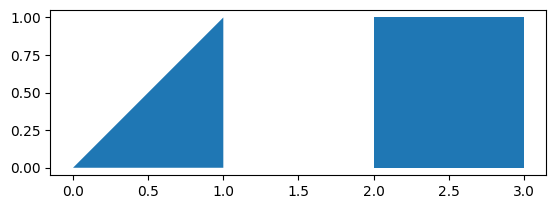

In [29]:
import matplotlib.pyplot as plt

g.plot()
plt.show()

[Link to GeoPandas](https://github.com/geopandas/geopandas).